numpy.linspace()も等差数列を生成するが、間隔（公差）ではなく要素数を指定する。

第一引数startに最初の値、第二引数stopに最後の値、第三引数numに要素数を指定する。それらに応じた間隔が自動的に算出される。

↓例



In [2]:
import numpy as np
print(np.linspace(0, 10, 3))
# [ 0.  5. 10.]

print(np.linspace(0, 10, 4))
# [ 0.          3.33333333  6.66666667 10.        ]

print(np.linspace(0, 10, 5))
# [ 0.   2.5  5.   7.5 10. ]

[ 0.  5. 10.]
[ 0.          3.33333333  6.66666667 10.        ]
[ 0.   2.5  5.   7.5 10. ]


np.where()を使って特定の条件を満たす項目を抜き出す処理は良く行う。 今回はその発展として、複数の値に一致する項目を抜き出してきたいという状況を考える。 そのような状況では、np.isin()を使えばよいという話。



In [3]:
fruits = ['apple', 'ringo', 'banana', 'mikan']
i_want_to_eat = ['ringo', 'mikan']

np.isin(fruits, i_want_to_eat)

array([False,  True, False,  True])

数値型に変換できる値は数値型に変換して、Noneや変換できない文字列は NaNで埋めてくれることです。
そして、それが、pandas.to_numericを使うと手軽に実現できます。

ポイントは、 errors="coerce"の部分です。
errorsは、”ignore”, “raise”, “coerce” の３種類の値を取ります。
“raise” がデフォルトで、これを指定すると普通に例外が発生します。
“ignore” は例外を抑えますが、何の変換もせず、そのままのオブジェクトを返します。
“coerce” は、数値に変換できるものは変換して、そうでないものはNaNにしてくれます。


In [6]:
import pandas as pd

# ダミーデータ生成
df = pd.DataFrame(
    {
        "key": ["key1", "key2", "key3", "key4"],
        "value_str": ["123", "45.67", None, "八十九"],
    }
)

# value_str 列の値を数値に変えられるものは変えた列を作る
df["value_num"] = pd.to_numeric(df["value_str"], errors="coerce") #←coerceは数字に変換できるものは数字に、できないものはNaNになる

print(df)
"""
    key value_str  value_num
0  key1       123     123.00
1  key2     45.67      45.67
2  key3      None        NaN
3  key4       八十九        NaN
"""

    key value_str  value_num
0  key1       123     123.00
1  key2     45.67      45.67
2  key3      None        NaN
3  key4       八十九        NaN


'\n    key value_str  value_num\n0  key1       123     123.00\n1  key2     45.67      45.67\n2  key3      None        NaN\n3  key4       八十九        NaN\n'

以上を表でまとめます。

tableというテーブルがあったとすると

            次元の数	各次元の数	全要素数
Numpy配列	table.ndim	table.shape	table.size
リスト＆タプル	len(table)	row=len(table),col=len(table[0])	sum(len(v) for v in table)

In [11]:
pass_BraCro =1484



In [1]:
def pass_90(pass_ex):
    pass_90 = pass_ex*0.75
    return pass_90

In [12]:
pass_90(pass_BraCro)

1113.0

In [10]:
pass_Gs_all =49968
matchs_Gs = 48
pass_Gs_mean = pass_Gs_all/48
pass_Gs_mean

1041.0

In [17]:
pass_Ks_all = 18547
pass_Ks_meanper90 =pass_Ks_all / (16+5/3)
pass_Ks_meanper90

1049.830188679245

In [18]:
pass_Ks_mean = pass_Ks_all/16
pass_Ks_mean

1159.1875

In [20]:
pass_NedArg =1331
pass_90(pass_NedArg)

998.25

In [11]:
pass_Ks_ex = 6889
pass_Ks_meanexin90 = pass_Ks_ex / (5.0+5/3)
print(pass_Ks_meanexin90)

1033.35


In [8]:
pass_Ks_90 =11658/11

1059.8181818181818

18547

# お試し前処理

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from statsbombpy import sb 
from mplsoccer import Pitch 
import numpy as np

In [3]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

## sklearnの簡易予測

In [4]:
event = sb.events(match_id=3893827)

#print(event)

Pass                 1099
Ball Receipt*        1059
Carry                 872
Pressure              420
Ball Recovery         101
Duel                   62
Goal Keeper            50
Shot                   46
Block                  43
Miscontrol             42
Dribble                31
Clearance              30
Dispossessed           21
Interception           19
Foul Committed         17
Dribbled Past          16
Foul Won               15
Substitution           10
Half Start              4
Half End                4
Injury Stoppage         3
Player Off              2
Player On               2
Referee Ball-Drop       2
Starting XI             2
Tactical Shift          2
Shield                  2
Error                   1

In [158]:
event_sk = event.replace({'type':{'Carry':'Dribble'}})

#replace({'age': [24, 18], 'point': 70}, 100))

event_sk = event_sk.replace({'type':['Ball Receipt*', 'Pressure','Ball Recovery', 'Duel', 'Goal Keeper', 'Shot', 'Block', 'Miscontrol',  'Clearance', 'Dispossessed', 'Interception', 'Foul Committed', 'Dribbled Past', 'Foul Won', 'Substitution','Half Start', 'Half End', 'Injury Stoppage', 'Player Off','Player On','Referee Ball-Drop','Starting XI', 'Tactical Shift', 'Shield', 'Error' ]},'Others')

event_sk

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_outcome,...,goalkeeper_end_location_x,goalkeeper_end_location_y,location_x,location_y,pass_end_location_x,pass_end_location_y,shot_end_location_x,shot_end_location_y,shot_end_location_z,type_num
0,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
1,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
2,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
3,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
4,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,NaN,...,NaN,NaN,32.8,64.2,NaN,NaN,NaN,NaN,NaN,22
3973,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,NaN,...,NaN,NaN,87.3,15.9,NaN,NaN,NaN,NaN,NaN,22
3974,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
3975,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20


In [159]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(event_sk['type'])

event_sk['type_num'] = le.transform(event_sk['type'])

#event

In [160]:
event_sk = event_sk.astype({'ball_receipt_outcome':'category','clearance_body_part':'category', 'dribble_outcome':'category', 'duel_outcome':'category', 
                         'duel_type': 'category', 'foul_committed_card': 'category', 'foul_committed_type': 'category', 'goalkeeper_body_part': 'category', 
                         'goalkeeper_outcome': 'category', 'goalkeeper_position': 'category', 'goalkeeper_technique': 'category', 'goalkeeper_type': 'category',
                         'id': 'category', 'interception_outcome': 'category', 'pass_assisted_shot_id': 'category', 'pass_body_part': 'category', 'pass_height': 'category',
                         'pass_outcome': 'category', 'pass_recipient': 'category', 'pass_technique': 'category', 'pass_type': 'category', 'play_pattern': 'category', 
                         'player': 'category', 'position': 'category', 'possession_team': 'category', 'shot_body_part': 'category', 'shot_key_pass_id': 'category', 'shot_outcome': 'category',
                         'shot_technique': 'category', 'substitution_replacement': 'category', 'team': 'category'})

In [161]:
event_sk = event_sk.drop('timestamp', axis=1)

In [162]:
#データセット作る
y = event_sk['type_num']
x = event_sk.drop(['type','type_num'], axis=1)

from sklearn.model_selection import train_test_split
#テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(x, y)


In [157]:
Y_train

3665     6
1656     0
3776    12
2906     3
746     18
        ..
1352     0
2303     3
94      18
3303    21
2739     3
Name: type_num, Length: 2982, dtype: int64

score1.00


<BarContainer object of 86 artists>

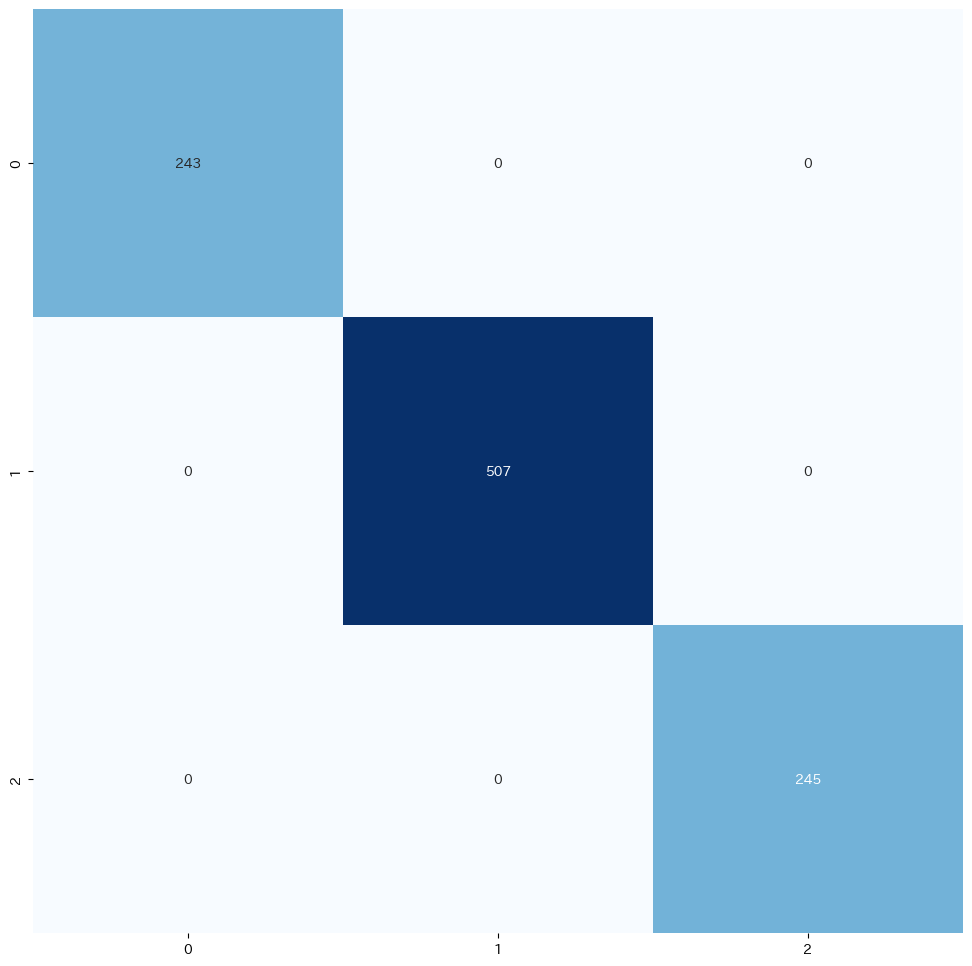

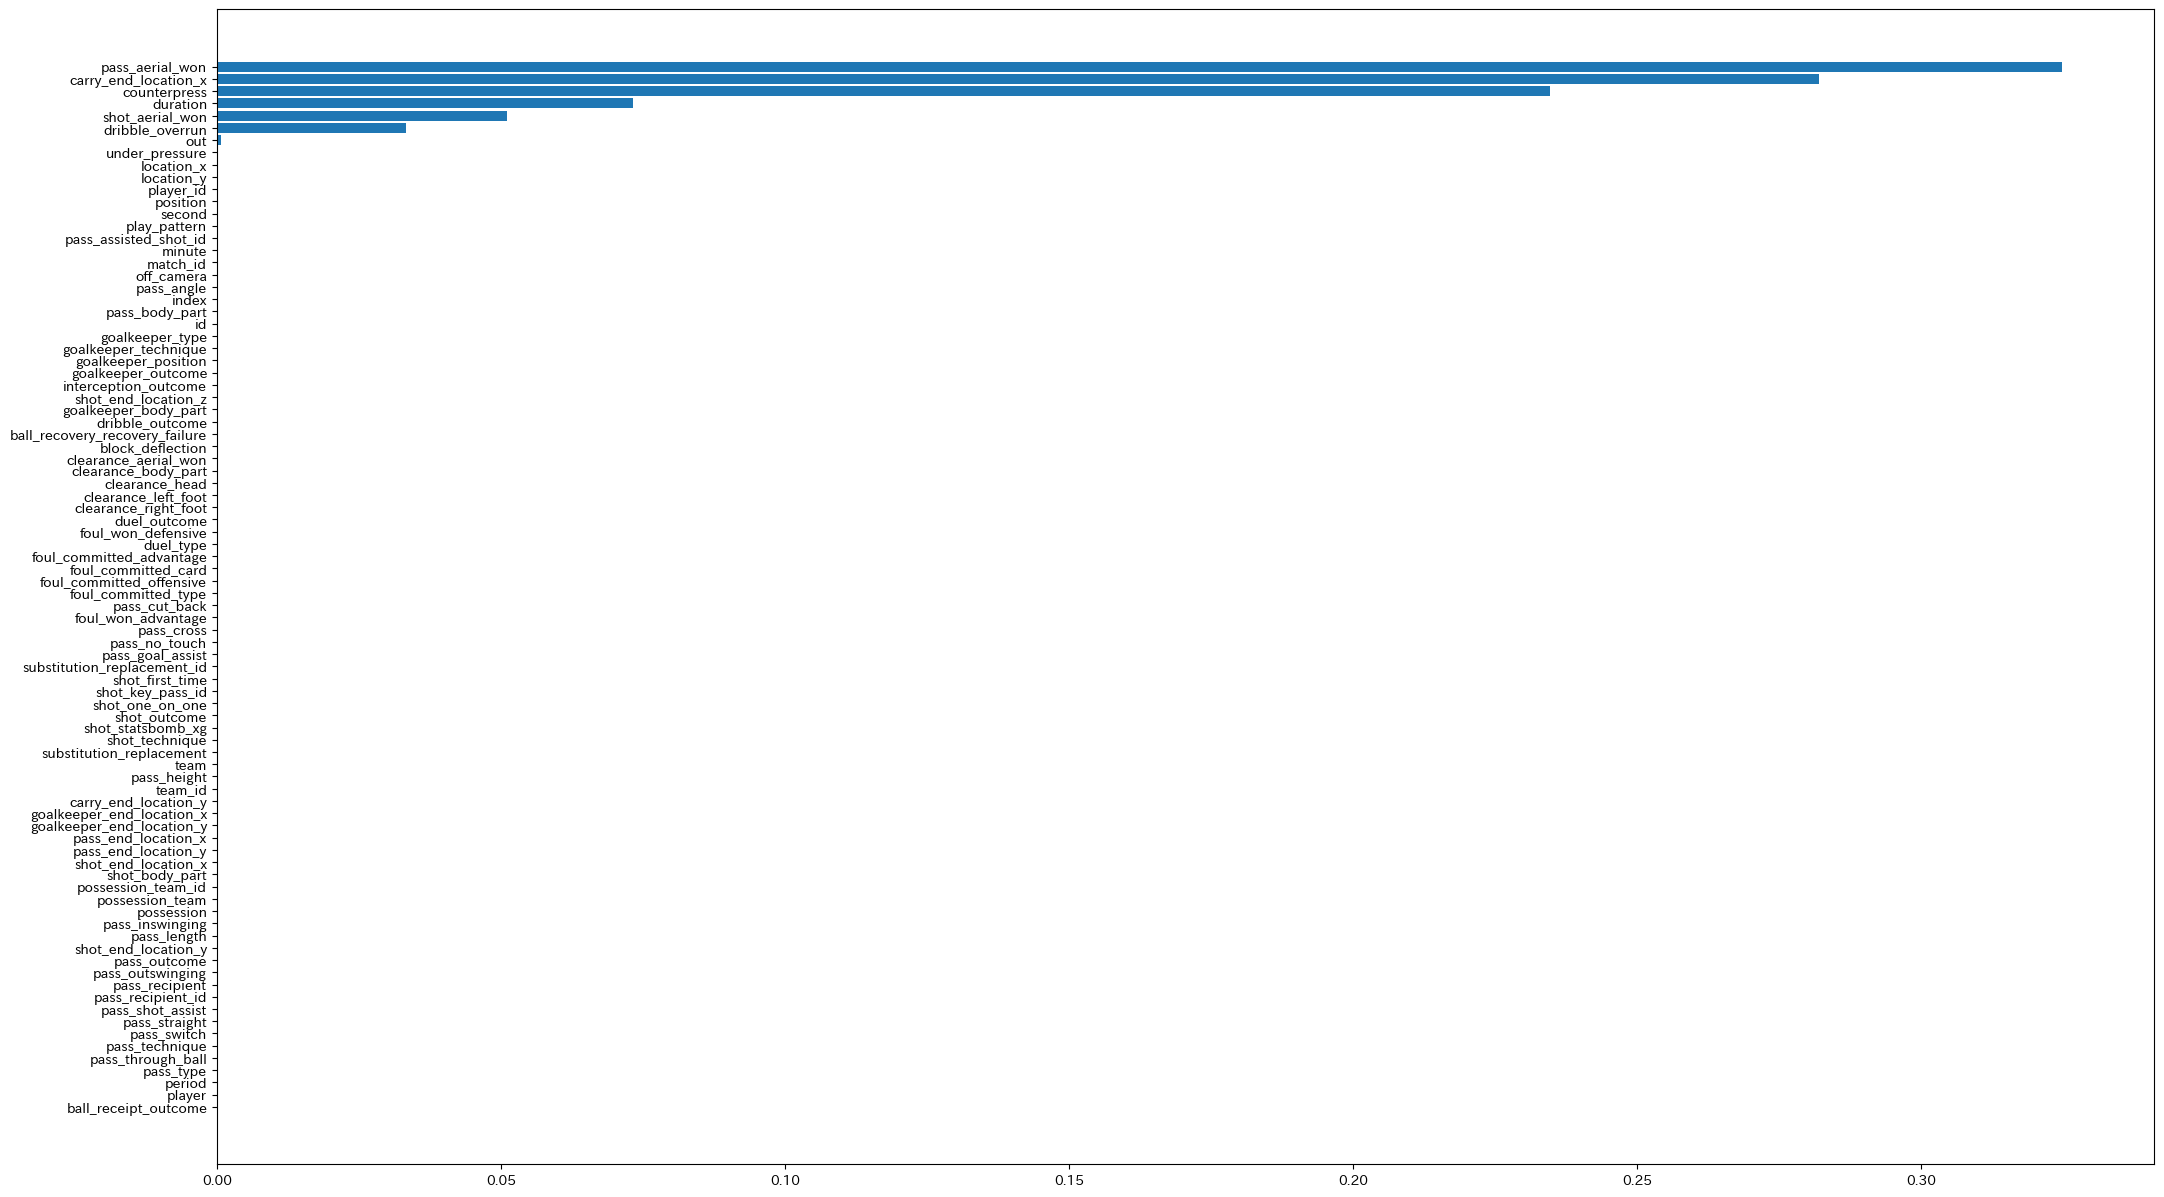

In [163]:
#モデルの作成・学習・評価
model = xgb.XGBClassifier(enable_categorical=True,random_state=1321 ) #XGBoostの分類モデルを作成
model.fit(X_train, Y_train) #学習
y_pred = model.predict(X_test) #予測
score = model.score(X_test, Y_test) #正解率
print(f'score{score:.2f}')

#混合行列(Confusion Matrix)
matrix = confusion_matrix(Y_test, y_pred) 
#matrix = pd.DataFrame(matrix, columns=['0:悪性', '1:良性'], index=['0:悪性', '1:良性'])
plt.figure(figsize=(12,12))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

#重要度分析
importance = model.feature_importances_
df_imp = pd.Series(importance, index=X_train.columns).sort_values(ascending=True)
plt.figure(figsize=(25,15))
plt.barh(df_imp.index, df_imp)

In [3]:

competition = sb.competitions()#-


print(competition)

    competition_id  season_id   country_name        competition_name  \
0                9        281        Germany           1. Bundesliga   
1                9         27        Germany           1. Bundesliga   
2             1267        107         Africa  African Cup of Nations   
3               16          4         Europe        Champions League   
4               16          1         Europe        Champions League   
..             ...        ...            ...                     ...   
69              55         43         Europe               UEFA Euro   
70              35         75         Europe      UEFA Europa League   
71              53        106         Europe       UEFA Women's Euro   
72              72        107  International       Women's World Cup   
73              72         30  International       Women's World Cup   

   competition_gender  competition_youth  competition_international  \
0                male              False                      Fa

In [9]:
match = sb.matches(competition_id=72, season_id= 107 )

print(match)

    match_id  match_date      kick_off                        competition  \
0    3904629  2023-08-16  13:00:00.000  International - Women's World Cup   
1    3906390  2023-08-20  13:00:00.000  International - Women's World Cup   
2    3906389  2023-08-19  11:00:00.000  International - Women's World Cup   
3    3904628  2023-08-15  11:00:00.000  International - Women's World Cup   
4    3893806  2023-07-26  10:30:00.000  International - Women's World Cup   
..       ...         ...           ...                                ...   
59   3893800  2023-07-24  09:00:00.000  International - Women's World Cup   
60   3893799  2023-07-24  11:30:00.000  International - Women's World Cup   
61   3893796  2023-07-23  08:00:00.000  International - Women's World Cup   
62   3893795  2023-07-22  15:00:00.000  International - Women's World Cup   
63   3893793  2023-07-22  10:00:00.000  International - Women's World Cup   

   season          home_team             away_team  home_score  away_score 

In [15]:
event = sb.events(match_id=3893827)

#print(event)

In [6]:
#DataFrameの複製
df2 = event.copy()

#データの抽出(ball_receipt_outcome)

df2 = df2[df2['type'] == 'Ball Receipt*']

df2['ball_receipt_outcome'] = df2['ball_receipt_outcome'].fillna('Complete')


# 結果の確認
#print(df2)

event['ball_receipt_outcome'] = df2['ball_receipt_outcome']

event['ball_receipt_outcome'] = event.ball_receipt_outcome.fillna('0').astype('category')




In [7]:
#次に処理する列の抽出/ball_recovery_recovery_faliure
#Ball_recoveryが発生したイベントを抜き出す
#df2 = event[event['type'] == 'Ball Recovery']



#Trueだけすでに入っているので残りを埋める
#df2['ball_recovery_recovery_failure'] = df2['ball_recovery_recovery_failure'].fillna(False).astype('boolean')
#df2['ball_recovery_recovery_failure'].describe()
#print(df2)


event.ball_recovery_recovery_failure = event.ball_recovery_recovery_failure.fillna(False).astype('boolean')

In [9]:
event['ball_recovery_recovery_failure'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3977 entries, 0 to 3976
Series name: ball_recovery_recovery_failure
Non-Null Count  Dtype  
--------------  -----  
3977 non-null   boolean
dtypes: boolean(1)
memory usage: 7.9 KB


In [117]:
event['ball_recovery_recovery_failure'] = df2['ball_recovery_recovery_failure']
print(event['ball_recovery_recovery_failure'].info())

event['ball_recovery_recovery_failure'] = event['ball_recovery_recovery_failure'].astype('boolean')
print(event['ball_recovery_recovery_failure'].info())


#print(event)

<class 'pandas.core.series.Series'>
RangeIndex: 3977 entries, 0 to 3976
Series name: ball_recovery_recovery_failure
Non-Null Count  Dtype  
--------------  -----  
101 non-null    boolean
dtypes: boolean(1)
memory usage: 7.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 3977 entries, 0 to 3976
Series name: ball_recovery_recovery_failure
Non-Null Count  Dtype  
--------------  -----  
101 non-null    boolean
dtypes: boolean(1)
memory usage: 7.9 KB
None


In [118]:
event['ball_recovery_recovery_failure'].describe()

count       101
unique        2
top       False
freq         91
Name: ball_recovery_recovery_failure, dtype: object

#Block_deflection
df2 = event[event['type']== 'Block']

#Block_deflectionの起こらなかったものを埋める
df2['block_deflection'] = df2['block_deflection'].fillna(False).astype('boolean')

#print(df2)

df2['block_deflection'].describe()


In [10]:
#元のファイルに結合する

#event['block_deflection'] = df2['block_deflection']

#中身確認
#print(event)

event['block_deflection'] = event['block_deflection'].fillna(False).astype('boolean')

event['block_deflection'].describe()


count      3977
unique        2
top       False
freq       3976
Name: block_deflection, dtype: object

In [11]:
df2 = event[event['type']== 'Carry']




In [12]:
#carry_end_location
# →[x,y]で値が格納されているのでend_location_x,end_location_yに分割して抽出
#その後元のcarry_end_locationをdropする
#event[['end_location_x', 'end_location_y']]
event_X_Y= df2['carry_end_location'].tolist()
event_X_Y= np.array(event_X_Y)




#event_X_Y_flat['carry_end_location_x'] = event_X_Y_flat['0']
#event = event.drop('carry_end_location', axis=1)

print(event_X_Y)


[[ 39.   23.5]
 [ 44.6   8.1]
 [ 61.2   8.7]
 ...
 [110.5  76.4]
 [ 96.1  64.2]
 [109.1  77.3]]


In [13]:
#x座標を代入
df2['carry_end_location_x'] = event_X_Y[:,0]
#y座標の代入
df2['carry_end_location_y'] = event_X_Y[:,1]

df2

/var/folders/4r/q23457zj19jgpy9vlsrvq0xm0000gp/T/ipykernel_40828/1930732980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['carry_end_location_x'] = event_X_Y[:,0]
/var/folders/4r/q23457zj19jgpy9vlsrvq0xm0000gp/T/ipykernel_40828/1930732980.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['carry_end_location_y'] = event_X_Y[:,1]


,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,carry_end_location_x,carry_end_location_y
2164,0,False,False,"[39.0, 23.5]",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Vietnam Women's,16769,00:00:02.847,Carry,NaN,39.0,23.5
2165,0,False,False,"[44.6, 8.1]",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Vietnam Women's,16769,00:00:05.485,Carry,NaN,44.6,8.1
2166,0,False,False,"[61.2, 8.7]",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Vietnam Women's,16769,00:00:07.740,Carry,True,61.2,8.7
2167,0,False,False,"[65.3, 4.0]",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Vietnam Women's,16769,00:00:09.769,Carry,True,65.3,4.0
2168,0,False,False,"[68.3, 69.7]",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Netherlands Women's,851,00:00:16.684,Carry,True,68.3,69.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,0,False,False,"[74.1, 75.6]",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Vietnam Women's,16769,00:51:21.133,Carry,True,74.1,75.6
3032,0,False,False,"[73.9, 61.3]",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Vietnam Women's,16769,00:51:24.166,Carry,NaN,73.9,61.3
3033,0,False,False,"[110.5, 76.4]",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Vietnam Women's,16769,00:51:28.715,Carry,NaN,110.5,76.4
3034,0,False,False,"[96.1, 64.2]",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Vietnam Women's,16769,00:51:51.341,Carry,NaN,96.1,64.2


In [14]:
#元のdataに結合

event['carry_end_location_x'] = df2['carry_end_location_x']
event['carry_end_location_y'] = df2['carry_end_location_y']

event = event.drop('carry_end_location', axis=1)

In [15]:
#clearance_aerial_wonのfalse
df2 = event[event['type']== 'Clearance']

#Falseで欠損値の一部埋め
#df2['clearance_aerial_won'] = df2['clearance_aerial_won'].fillna(False)
#df2['clearance_head'] = df2['clearance_head'].fillna(False)
#df2['clearance_right_foot'] = df2['clearance_right_foot'].fillna(False)
#df2['clearance_left_foot'] = df2['clearance_left_foot'].fillna(False)

#元のeventに戻す
event['clearance_aerial_won'] = df2['clearance_aerial_won'].fillna(False).astype('boolean')
event['clearance_head'] = df2['clearance_head'].fillna(False).astype('boolean')
event['clearance_right_foot'] = df2['clearance_right_foot'].fillna(False).astype('boolean')
event['clearance_left_foot'] = df2['clearance_left_foot'].fillna(False).astype('boolean')


In [16]:
#dribble_overrun
#df2 = event[event['type']=='Dribble']

#欠損値埋め
#df2['dribble_overrun'] =df2['dribble_overrun'].fillna(False)

event['dribble_overrun'] = df2['dribble_overrun'].fillna(False).astype('boolean')

In [17]:
#about foul
df2 = event[event['type'] == 'Foul Committed' ]

#欠損値を埋める
df2['foul_committed_advantage'] = df2['foul_committed_advantage'].fillna(False)
df2['foul_committed_card'] = df2['foul_committed_card'].fillna('No Card')
df2['foul_committed_offensive'] = df2['foul_committed_offensive'].fillna(False)

#元のデータに戻す
event['foul_committed_advantage'] = df2['foul_committed_advantage'].fillna(False).astype('boolean')
event['foul_committed_card'] = df2['foul_committed_card'].astype('category')
event['foul_committed_offensive'] = df2['foul_committed_offensive'].fillna(False).astype('boolean')




/var/folders/4r/q23457zj19jgpy9vlsrvq0xm0000gp/T/ipykernel_40828/1843683671.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['foul_committed_advantage'] = df2['foul_committed_advantage'].fillna(False)
/var/folders/4r/q23457zj19jgpy9vlsrvq0xm0000gp/T/ipykernel_40828/1843683671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['foul_committed_card'] = df2['foul_committed_card'].fillna('No Card')
/var/folders/4r/q23457zj19jgpy9vlsrvq0xm0000gp/T/ipykernel_40828/1843683671.py:7: SettingWithCopyWarni

In [18]:
#about foul
#df2 = event[event['type'] == 'Foul Won' ]

#欠損値埋め
#df2['foul_won_advantage'] = df2['foul_won_advantage'].fillna(False)
#df2['foul_won_defensive'] = df2['foul_won_defensive'].fillna(False)

#元のデータに戻す
event['foul_won_advantage'] = df2['foul_won_advantage'].fillna(False).astype('boolean')
event['foul_won_defensive'] = df2['foul_won_defensive'].fillna(False).astype('boolean')


In [19]:
#goalkeepr_end_potition
df2 = event[event['type'] == 'Goal Keeper' ]

event_X_Y= df2['goalkeeper_end_location']
event_X_Ydf =event_X_Y.apply(pd.Series)

#event_X_Ydf

#x座標を代入
df2['goalkeeper_end_location_x'] = event_X_Ydf[0]

#y座標の代入
df2['goalkeeper_end_location_y'] = event_X_Ydf[1]

#元のdataに結合

event['goalkeeper_end_location_x'] = df2['goalkeeper_end_location_x']
event['goalkeeper_end_location_y'] = df2['goalkeeper_end_location_y']

event = event.drop('goalkeeper_end_location', axis=1)

event

/var/folders/4r/q23457zj19jgpy9vlsrvq0xm0000gp/T/ipykernel_40828/1507863926.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['goalkeeper_end_location_x'] = event_X_Ydf[0]
/var/folders/4r/q23457zj19jgpy9vlsrvq0xm0000gp/T/ipykernel_40828/1507863926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['goalkeeper_end_location_y'] = event_X_Ydf[1]


,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_outcome,...,tactics,team,team_id,timestamp,type,under_pressure,carry_end_location_x,carry_end_location_y,goalkeeper_end_location_x,goalkeeper_end_location_y
0,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,"{'formation': 343, 'lineup': [{'player': {'id'...",Vietnam Women's,16769,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN
1,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,"{'formation': 352, 'lineup': [{'player': {'id'...",Netherlands Women's,851,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN
2,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,NaN,Vietnam Women's,16769,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN
3,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,NaN,Netherlands Women's,851,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN
4,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,NaN,Vietnam Women's,16769,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,NaN,Netherlands Women's,851,00:05:02.341,Referee Ball-Drop,NaN,NaN,NaN,NaN,NaN
3973,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,NaN,Vietnam Women's,16769,00:05:02.518,Referee Ball-Drop,NaN,NaN,NaN,NaN,NaN
3974,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,NaN,Vietnam Women's,16769,00:05:25.397,Player On,NaN,NaN,NaN,NaN,NaN
3975,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,NaN,Vietnam Women's,16769,00:18:00.681,Player On,NaN,NaN,NaN,NaN,NaN


In [20]:
event = event.drop('injury_stoppage_in_chain', axis=1)

In [21]:
#location
event_X_Y= event['location']
event_X_Ydf =event_X_Y.apply(pd.Series)

#event_X_Ydf

#x座標を代入
event['location_x'] = event_X_Ydf[0]

#y座標の代入
event['location_y'] = event_X_Ydf[1]

#元のdataに結合

#event['goalkeeper_end_location_x'] = df2['goalkeeper_end_location_x']
#event['goalkeeper_end_location_y'] = df2['goalkeeper_end_location_y']

event = event.drop('location', axis=1)

event

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_outcome,...,team_id,timestamp,type,under_pressure,carry_end_location_x,carry_end_location_y,goalkeeper_end_location_x,goalkeeper_end_location_y,location_x,location_y
0,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,16769,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,851,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,16769,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,851,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,16769,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,851,00:05:02.341,Referee Ball-Drop,NaN,NaN,NaN,NaN,NaN,32.8,64.2
3973,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,16769,00:05:02.518,Referee Ball-Drop,NaN,NaN,NaN,NaN,NaN,87.3,15.9
3974,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,16769,00:05:25.397,Player On,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3975,0,False,False,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,...,16769,00:18:00.681,Player On,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
event['off_camera'] = event['off_camera'].fillna(False).astype('boolean')


In [24]:
#out(ball_out)
#<<<<<<< Tabnine <<<<<<<
#df2 = event[event['type'] == ('Block')| ('Clearance')| ('Ball Recovery') | ('Miscontrol') | ('Dribble')]#-
df2 = event[event['type'].isin(['Block', 'Clearance', 'Ball Recovery', 'Miscontrol', 'Dribble'])]#+
#>>>>>>> Tabnine >>>>>>># {"conversationId":"6f5308d9-75ae-425a-ab23-e7eab9dcee73","source":"instruct"}

#欠損値埋め
df2['out'] = df2['out'].fillna(False)

#元のdataにもどす
event['out'] = df2['out'].fillna(False).astype('boolean')

#event

/var/folders/4r/q23457zj19jgpy9vlsrvq0xm0000gp/T/ipykernel_40828/4224957337.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['out'] = df2['out'].fillna(False)


In [25]:
#counterpress

#df2 = event[event['type'].isin(['Block', 'Dribbbled Past', 'Duel', 'Foul Committed', 'Pressure', 'Interception'])]

#欠損値埋め

#df2['counterpress'] = df2['counterpress'].fillna(False)

#元のデータに戻す
event['counterpress'] = event['counterpress'].fillna(False).astype('boolean')


/var/folders/4r/q23457zj19jgpy9vlsrvq0xm0000gp/T/ipykernel_40828/267617849.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['counterpress'] = df2['counterpress'].fillna(False)


In [26]:
#about pass
df2 = event[event['type'] == 'Pass']

#欠損値埋め
#df2['pass_aerial_won'] = df2['pass_aerial_won'].fillna(False)
#df2['pass_cross'] = df2['pass_cross'].fillna(False)
#df2['pass_cut_back'] = df2['pass_cut_back'].fillna(False)
#df2['pass_goal_assist'] = df2['pass_goal_assist'].fillna(False)
#df2['pass_inswinging'] = df2['pass_inswinging'].fillna(False)
#df2['pass_no_touch'] = df2['pass_no_touch'].fillna(False)
#df2['pass_outswinging'] = df2['pass_outswinging'].fillna(False)
#df2['pass_through_ball'] = df2['pass_through_ball'].fillna(False)
#df2['pass_shot_assist'] = df2['pass_shot_assist'].fillna(False)
#df2['pass_straight'] = df2['pass_straight'].fillna(False)
#df2['pass_switch'] = df2['pass_switch'].fillna(False)



#元のdataにもどす
event['pass_aerial_won'] = event['pass_aerial_won'].fillna(False).astype('boolean')
event['pass_cross'] = event['pass_cross'].fillna(False).astype('boolean')
event['pass_cut_back'] = event['pass_cut_back'].fillna(False).astype('boolean')
event['pass_goal_assist'] = event['pass_goal_assist'].fillna(False).astype('boolean')
event['pass_inswinging'] = event['pass_inswinging'].fillna(False).astype('boolean')
event['pass_no_touch'] = event['pass_no_touch'].fillna(False).astype('boolean')
event['pass_outswinging'] = event['pass_outswinging'].fillna(False).astype('boolean')
event['pass_through_ball'] = event['pass_through_ball'].fillna(False).astype('boolean')
event['pass_shot_assist'] = event['pass_shot_assist'].fillna(False).astype('boolean')
event['pass_straight'] = event['pass_straight'].fillna(False).astype('boolean')
event['pass_switch'] = event['pass_switch'].fillna(False).astype('boolean')

#event

In [27]:
#pass_end_location
event_X_Y= event['pass_end_location']
event_X_Ydf =event_X_Y.apply(pd.Series)

#event_X_Ydf

#x座標を代入
event['pass_end_location_x'] = event_X_Ydf[0]

#y座標の代入
event['pass_end_location_y'] = event_X_Ydf[1]

#元のdataに結合

#event['goalkeeper_end_location_x'] = df2['goalkeeper_end_location_x']
#event['goalkeeper_end_location_y'] = df2['goalkeeper_end_location_y']

event = event.drop('pass_end_location', axis=1)
#event

In [28]:
#about shot 
#df2 = event[event['type'] == 'Shot']

#欠損値埋め
#df2['shot_aerial_won'] = df2['shot_aerial_won'].fillna(False)
#df2['shot_first_time'] = df2['shot_first_time'].fillna(False)
#df2['shot_one_on_one'] = df2['shot_one_on_one'].fillna(False)
#df2['shot_type'] = df2['shot_type'].fillna('Set Play')

#元のデータに戻す
event['shot_aerial_won'] = event['shot_aerial_won'].fillna(False).astype('boolean')
event['shot_first_time'] = event['shot_first_time'].fillna(False).astype('boolean')
event['shot_one_on_one'] = event['shot_one_on_one'].fillna(False).astype('boolean')

#event

In [29]:
#underpressure
event['under_pressure'] = event['under_pressure'].fillna(False).astype('boolean')


In [30]:
#shot_end_location
event_X_Y= event['shot_end_location']
event_X_Ydf =event_X_Y.apply(pd.Series)

#x座標を代入
event['shot_end_location_x'] = event_X_Ydf[0]

#y座標の代入
event['shot_end_location_y'] = event_X_Ydf[1]

#z座標の取得
event['shot_end_location_z'] = event_X_Ydf[2]

#元のdataに結合

#event['goalkeeper_end_location_x'] = df2['goalkeeper_end_location_x']
#event['goalkeeper_end_location_y'] = df2['goalkeeper_end_location_y']

event = event.drop('shot_end_location', axis=1)
#event


In [31]:
event = event.drop(["related_events", "tactics", "shot_freeze_frame"], axis=1)

In [32]:
event = event.drop(["shot_type", "substitution_outcome_id","substitution_outcome"], axis=1)

In [50]:
df2 =  event[event['type'] =='Error']
df2

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_outcome,...,goalkeeper_end_location_x,goalkeeper_end_location_y,location_x,location_y,pass_end_location_x,pass_end_location_y,shot_end_location_x,shot_end_location_y,shot_end_location_z,type_num
3976,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,NaN,...,NaN,NaN,29.8,53.4,NaN,NaN,NaN,NaN,NaN,9


In [33]:
event = event.drop(3976, axis=0)

In [34]:
event['type'].value_counts()

Pass                 1099
Ball Receipt*        1059
Carry                 872
Pressure              420
Ball Recovery         101
Duel                   62
Goal Keeper            50
Shot                   46
Block                  43
Miscontrol             42
Dribble                31
Clearance              30
Dispossessed           21
Interception           19
Foul Committed         17
Dribbled Past          16
Foul Won               15
Substitution           10
Half Start              4
Half End                4
Injury Stoppage         3
Referee Ball-Drop       2
Player Off              2
Starting XI             2
Tactical Shift          2
Shield                  2
Player On               2
Name: type, dtype: int64

In [35]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 88 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ball_receipt_outcome            3976 non-null   category
 1   ball_recovery_recovery_failure  3976 non-null   boolean 
 2   block_deflection                3976 non-null   boolean 
 3   clearance_aerial_won            30 non-null     boolean 
 4   clearance_body_part             30 non-null     object  
 5   clearance_head                  30 non-null     boolean 
 6   clearance_left_foot             30 non-null     boolean 
 7   clearance_right_foot            30 non-null     boolean 
 8   counterpress                    3976 non-null   boolean 
 9   dribble_outcome                 31 non-null     object  
 10  dribble_overrun                 30 non-null     boolean 
 11  duel_outcome                    36 non-null     object  
 12  duel_type           

In [ ]:
event

In [148]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(event['type'])

event['type_num'] = le.transform(event['type'])

event

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_outcome,...,carry_end_location_y,goalkeeper_end_location_x,goalkeeper_end_location_y,location_x,location_y,pass_end_location_x,pass_end_location_y,shot_end_location_x,shot_end_location_y,shot_end_location_z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.8,64.2,NaN,NaN,NaN,NaN,NaN
3973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,87.3,15.9,NaN,NaN,NaN,NaN,NaN
3974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## pycaret

In [178]:
import pycaret
from pycaret.classification import *
from imblearn.over_sampling import SMOTENC

In [180]:
X_train, Y_train = SMOTENC(categorical_features= 'auto').fit_resample(X_train, Y_train)

ValueError: Input contains NaN.

In [176]:
exp_trial = setup(data=event_sk, target= 'type' ,ignore_features = ["id", "pass_assisted_shot_id"], 
                  categorical_features = ['ball_receipt_outcome', 'foul_committed_card', 'clearance_body_part', 'dribble_outcome',
                                          'duel_outcome','duel_type', 'foul_committed_type', 'goalkeeper_body_part', 'goalkeeper_outcome',
                                          'goalkeeper_position', 'goalkeeper_technique','goalkeeper_type', 'interception_outcome', 
                                          'pass_body_part', 'pass_height', 'pass_outcome', 'pass_recipient',
                                          'pass_technique', 'pass_type', 'play_pattern', 'player', 'position',
                                          'possession_team', 'shot_body_part', 'shot_key_pass_id', 'shot_outcome',
                                          'shot_technique', 'substitution_replacement', 'team'], 
                  session_id= 1321)

#create_date_columns=["minute", "second"],fix_imbalance= True, fix_imbalance_method= 'smotenc(categorical_features = "infer")'

ValueError: Invalid value for the strategy parameter, got smotenc(categorical_features = "infer"). Choose from: condensednearestneighbour, editednearestneighborus, repeatededitednearestneighbours, allknn, instancehardnessthreshold, nearmiss, neighbourhoodcleaningrule, onesidedselection, randomundersampler, tomeklinks, randomoversampler, smote, smotenc, smoten, adasyn, borderlinesmote, kmeanssmote, svmsmote, smoteenn, smotetomek.

In [168]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1310
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2320
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2370
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6700
dummy,Dummy Classifier,0.4966,0.5000,0.4966,0.2466,0.3295,0.0000,0.0000,0.1290


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=1321, splitter='best')